# Good and Bad Customers for Granting Credit

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
bcc= pd.read_csv('BankCreditCard.csv')

In [ ]:
bcc.head()

## Check for Null Value

In [ ]:
bcc.isnull().sum()

There is no null value, so we can move forward with visualization and see if the target variable is balanced

In [6]:
bcc.shape

(30000, 25)

In [7]:
bcc.Default_Payment.unique()

array([1, 0], dtype=int64)

In [8]:
bcc['Default_Payment'].value_counts()

0    23364
1     6636
Name: Default_Payment, dtype: int64

## Graphical EDA

In [9]:
#sns.pairplot(bcc)

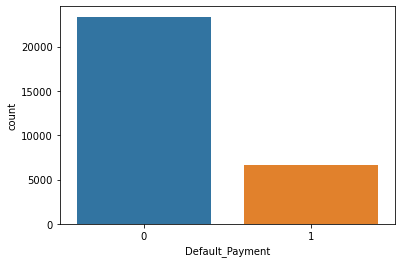

In [10]:
sns.countplot(bcc['Default_Payment']);

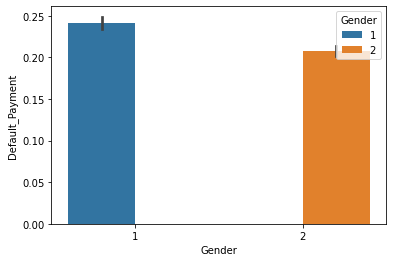

In [11]:
sns.barplot(bcc['Gender'], bcc['Default_Payment'],hue= bcc.Gender);

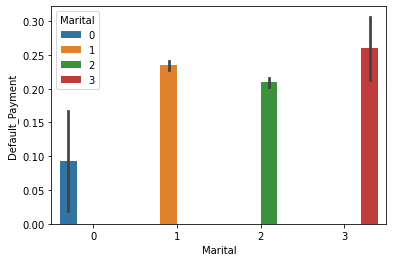

In [12]:
sns.barplot(bcc['Marital'],bcc['Default_Payment'], hue=bcc['Marital'] );

In [13]:
bcc.drop(bcc[bcc['Marital'] ==0].index, inplace = True)# zero is not defined hence droping

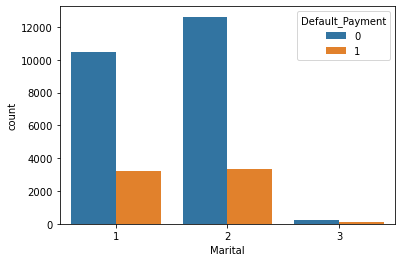

In [14]:
sns.countplot(data=bcc, x=bcc.Marital, hue=bcc.Default_Payment);

## Model Building

In [15]:
bcc1= bcc.drop('Customer ID',axis=1)

In [16]:
x=bcc1.drop('Default_Payment',axis=1)
y=bcc['Default_Payment']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [18]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [19]:
#sc.fit_transform(x_train)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform (x_test)

In [21]:
x_test_std

array([[ 1.10327635, -1.23463583,  0.18821602, ..., -0.11039182,
        -0.11542411, -0.06714203],
       [ 1.70490031,  0.80995544,  0.18821602, ..., -0.30965499,
         1.83386029,  3.72396595],
       [-1.07761052,  0.80995544,  1.45642053, ..., -0.30965499,
        -0.28883048, -0.10407895],
       ...,
       [ 0.05043441,  0.80995544, -1.07998849, ..., -0.12850666,
        -0.13299314, -0.12512777],
       [ 0.05043441, -1.23463583, -1.07998849, ..., -0.03714751,
        -0.28578518, -0.28221115],
       [-1.07761052,  0.80995544,  1.45642053, ..., -0.30965499,
        -0.25404379, -0.24399855]])

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
glm= LogisticRegression()

In [24]:
glm.fit(x_train_std,y_train)

LogisticRegression()

In [25]:
pred= glm.predict(x_test_std)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score

In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7028
           1       0.70      0.35      0.47      1956

    accuracy                           0.83      8984
   macro avg       0.77      0.65      0.68      8984
weighted avg       0.81      0.83      0.80      8984



In [28]:
from sklearn import metrics 

print('Accuracy:',round(metrics.accuracy_score(y_test,pred),2))

Accuracy: 0.83


In [29]:
print(confusion_matrix(y_test,pred))

[[6735  293]
 [1271  685]]


In [30]:
#false_positive_rate, true_positive_rate, threshold2 = roc_curve(y_test, pred)

In [31]:
#print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, pred))

In [32]:
#from sklearn import metrics
#metrics.plot_roc_curve(glm, x_test_std, y_test)

In [33]:
from sklearn.svm import SVC
from sklearn import metrics

In [34]:
# Create support vector classifier object
svc = SVC(kernel='linear', random_state=0)

# Train classifier
model = svc.fit(x_train_std,y_train)

In [35]:
# View number of support vectors for each class
model.n_support_

array([4898, 4359])

In [36]:
pred_svm= model.predict(x_test_std)

In [37]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7028
           1       0.68      0.37      0.48      1956

    accuracy                           0.82      8984
   macro avg       0.76      0.66      0.68      8984
weighted avg       0.81      0.82      0.80      8984



In [38]:
from sklearn import metrics 

print('Accuracy:',round(metrics.accuracy_score(y_test,pred_svm),2))

Accuracy: 0.82


In [39]:
print(confusion_matrix(y_test,pred_svm))

[[6691  337]
 [1241  715]]


In [40]:
print(confusion_matrix(y_test,pred))

[[6735  293]
 [1271  685]]


In [41]:
337+1241

1578

In [42]:
293+1271

1564

## Trying to see the model accuracy after OverSamplling with SMOTE

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
sm= SMOTE()
x_train_sm,y_train_sm= sm.fit_resample(x_train,y_train)

In [45]:
print(y_train_sm.value_counts())

1    16287
0    16287
Name: Default_Payment, dtype: int64


In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train_sm)
x_test_std = sc.transform (x_test)

In [47]:
glm.fit(x_train_std,y_train_sm)

LogisticRegression()

In [48]:
pred1= glm.predict(x_test_std)

In [49]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      7028
           1       0.41      0.61      0.49      1956

    accuracy                           0.73      8984
   macro avg       0.64      0.68      0.65      8984
weighted avg       0.77      0.73      0.74      8984



In [50]:
from sklearn import metrics 

print('Accuracy:',round(metrics.accuracy_score(y_test,pred1),2))

Accuracy: 0.73


In [51]:
# Train classifier SVM
model = svc.fit(x_train_std,y_train_sm)

In [52]:
pred2= model.predict(x_test_std)

In [53]:
from sklearn import metrics 

print('Accuracy:',round(metrics.accuracy_score(y_test,pred2),2))

Accuracy: 0.73
